In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from fanalysis.ca import CA


## Load the data
df = pd.read_csv("../new_data/CleanedAuthors.csv")

display(df.head())

,Unnamed: 0,author_average_rating,author_gender,author_genres,author_id,author_name,author_rating_count,author_review_count,birthplace,book_average_rating,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date
0,0,4.01,female,"historical-fiction,",74489,Victoria Thompson,74399,6268,United States,4.02,686717,Murder on St. Mark's Place,Mystery,Historical,5260,375,277,2000
1,1,4.15,male,"literature-fiction,mystery-thrillers,",706255,Stieg Larsson,3726435,142704,Sweden,4.13,2429135,The Girl with the Dragon Tattoo,Fiction,Mystery,2229163,65227,465,August 2005
2,2,4.00,female,"romance,",5618190,Mimi Jean Pamfiloff,76496,7975,United States,3.99,27833684,Tailored for Trouble,Romance,Contemporary,2151,391,354,2016
3,3,3.88,male,"fiction,memoir,",37871,José Donoso,5522,489,Chile,4.14,382975,The Obscene Bird of Night,Fiction,Magical Realism,1844,173,438,1970
4,4,4.10,female,"young-adult,fantasy,",36122,Patricia C. Wrede,291013,13453,United States,4.01,64207,Sorcery & Cecelia: or The Enchanted Chocolate Pot,Fantasy,Young Adult,17051,1890,326,April 15th 1988


In [10]:
import pycountry_convert as pc

# Function to get continent
def get_continent(country_name):
    try:
        ## enlever les espaces
        country_name = country_name.strip()  
        # si c'est les United States on les laisse a part
        if country_name == 'United States':
            return 'United States'
        # pareil pour United Kingdom
        if country_name == 'United Kingdom':
            return 'United Kingdom'      
        # Obtenir le code alpha-2 du pays (ISO 3166)
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        # Obtenir le code du continent à partir du code alpha-2 du pays
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        # Mapper le code du continent à son nom
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except Exception as e:
        return None  # Si le pays n'est pas trouvé ou autre erreur, retourner None

# Keep only the necessary columns
df = df[['birthplace', 'genre_1']]

# Apply the function to get the continent
df['continent'] = df['birthplace'].apply(get_continent)


# display the first 5 rows
display(df.head())


display(df['continent'].value_counts())

,birthplace,genre_1,continent
0,United States,Mystery,United States
1,Sweden,Fiction,Europe
2,United States,Romance,United States
3,Chile,Fiction,South America
4,United States,Fantasy,United States


continent
United States     11471
United Kingdom     2164
Europe             1316
Asia               1181
North America       755
Oceania             506
Africa              458
South America        85
Name: count, dtype: int64

In [11]:
# Create a contingency table
contingency_table = pd.crosstab(df['continent'], df['genre_1'])
display(contingency_table)

genre_1,Adult,Adult Fiction,Adventure,Amish,Animals,Anthologies,Apocalyptic,Art,Asian Literature,Autobiography,...,Thriller,Travel,United States,War,Warfare,Westerns,Womens Fiction,World War II,Writing,Young Adult
continent,,,,,,,,,,,,,,,,,,,,,
Africa,0,1,1,0,1,1,0,0,1,0,...,1,5,0,0,0,0,0,0,0,16
Asia,0,0,0,0,0,0,0,1,50,2,...,5,4,0,2,0,0,1,0,0,22
Europe,0,5,2,0,1,1,0,2,1,5,...,5,5,0,0,0,0,3,6,0,35
North America,0,5,0,0,5,0,0,0,0,0,...,10,3,0,1,0,1,3,0,0,89
Oceania,0,1,2,0,1,0,0,0,0,2,...,5,1,0,0,0,0,0,0,0,48
South America,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,2,0,0,2
United Kingdom,1,14,9,0,5,0,0,0,0,11,...,34,18,0,3,0,0,35,0,1,103
United States,1,45,11,7,27,11,3,4,2,59,...,66,26,1,10,5,11,40,3,3,1441


In [12]:
# standardize the data
temp = contingency_table.sub(contingency_table.mean())
data_scaled = temp.div(contingency_table.std())

In [13]:
# p_value
chi_square_value, p_value = calculate_bartlett_sphericity(data_scaled)
print(p_value)

1.0


/usr/local/lib/python3.12/site-packages/factor_analyzer/factor_analyzer.py:109: RuntimeWarning:

divide by zero encountered in log



In [14]:
## make the CA
my_ca=CA(row_labels=contingency_table.index, col_labels=contingency_table.columns, stats=True)
my_ca.fit(contingency_table.values)

CA(col_labels=Index(['Adult', 'Adult Fiction', 'Adventure', 'Amish', 'Animals',
       'Anthologies', 'Apocalyptic', 'Art', 'Asian Literature',
       'Autobiography',
       ...
       'Thriller', 'Travel', 'United States', 'War', 'Warfare', 'Westerns',
       'Womens Fiction', 'World War II', 'Writing', 'Young Adult'],
      dtype='object', name='genre_1', length=118),
   row_labels=Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America',
       'United Kingdom', 'United States'],
      dtype='object', name='continent'))

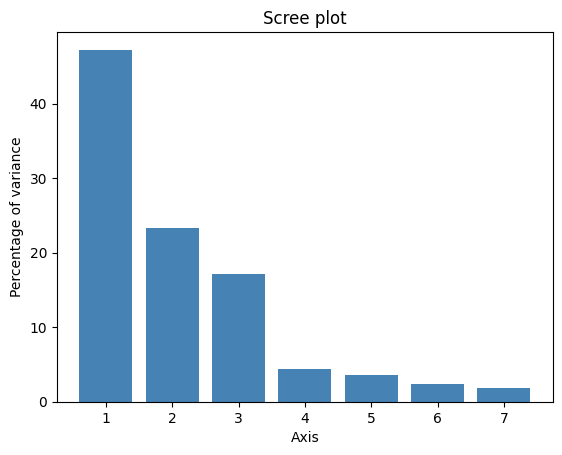

In [15]:
my_ca.eig_
# graphique of the eigenvalues
my_ca.plot_eigenvalues(type="percentage")

In [16]:
# create a scatter plot of the row and column coordinates with continent and genre labels
fig = px.scatter(x=my_ca.col_coord_[:,0], y=my_ca.col_coord_[:,1], text=contingency_table.columns)
fig.update_traces(name='Genres', showlegend=True)

fig.add_scatter(x=my_ca.row_coord_[:,0], y=my_ca.row_coord_[:,1], mode='markers+text', text=contingency_table.index, marker=dict(size=15, opacity=0.7, color='red', line=dict(color='black', width=1)), name='Continents')
fig.update_traces(textposition='bottom center', textfont=dict(color='rgba(0,0,0,0)'))

fig.update_layout(title='Scatter Plot of Genre and Continent', xaxis_title='Dim 1', yaxis_title='Dim 2')

fig.show()
